# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/90d1e0ca1f65e6b081828f299501e61c9e16924e04bf3422fc197174.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **St Louis, Missouri, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'90d1e0ca1f65e6b081828f299501e61c9e16924e04bf3422fc197174')

Find min and max temperatures across 2005 - 2014 across 365 days
Need to create a y-axis of temperature, and an x-axis of 1-365 for each day of a year.
So for the first day of the year, Jan 1, you want to consider all of the 2005 through 2014 data and find the biggest Tmax and smallest Tmin, then plot these two values. Continue to do this for all 365 calendar days. Then you want a scatter plot of an Tmax and Tmin outside of those bounds projected on top, using the 2015 data.

In [2]:
# Read the data
data1 = pd.read_csv("data/C2A2_data/BinnedCsvs_d400/90d1e0ca1f65e6b081828f299501e61c9e16924e04bf3422fc197174.csv")
data1.head()

,ID,Date,Element,Data_Value
0,USC00237397,2014-03-05,TMIN,-94
1,USW00003960,2008-04-04,TMAX,100
2,USW00003966,2009-08-18,TMAX,283
3,USW00003966,2011-10-25,TMAX,289
4,USC00118147,2006-12-24,TMAX,100


In [3]:
len(data1)

86842

In [4]:
# Unpack Date column by slicing values for Year and Month-Day
data1['Year'], data1['Month-Day'] = zip(*data1['Date'].apply(lambda x: (x[:4], x[5:])))
data1.head()

,ID,Date,Element,Data_Value,Year,Month-Day
0,USC00237397,2014-03-05,TMIN,-94,2014,03-05
1,USW00003960,2008-04-04,TMAX,100,2008,04-04
2,USW00003966,2009-08-18,TMAX,283,2009,08-18
3,USW00003966,2011-10-25,TMAX,289,2011,10-25
4,USC00118147,2006-12-24,TMAX,100,2006,12-24


In [5]:
# Find all leap year days of Feb. 29th
leap = data1[data1['Month-Day'] == '02-29']
leap


,ID,Date,Element,Data_Value,Year,Month-Day
2315,USC00238746,2012-02-29,TMAX,189,2012,02-29
2393,USC00238746,2012-02-29,TMIN,11,2012,02-29
7433,USC00237452,2012-02-29,TMIN,50,2012,02-29
7553,USC00237452,2012-02-29,TMAX,183,2012,02-29
8222,USC00237398,2012-02-29,TMIN,39,2012,02-29
8231,USC00237398,2012-02-29,TMAX,183,2012,02-29
10710,USC00118147,2012-02-29,TMIN,28,2012,02-29
10718,USC00118147,2012-02-29,TMAX,178,2012,02-29
11127,USC00232850,2012-02-29,TMIN,39,2012,02-29
11132,USC00232850,2012-02-29,TMAX,200,2012,02-29


In [6]:
len(leap)

44

In [7]:
# Create a new df that does not have leap year and 2015 values
data2 = data1[(data1['Month-Day'] !='02-29') & (data1['Year'] !='2015')]
data2.head()

,ID,Date,Element,Data_Value,Year,Month-Day
0,USC00237397,2014-03-05,TMIN,-94,2014,03-05
1,USW00003960,2008-04-04,TMAX,100,2008,04-04
2,USW00003966,2009-08-18,TMAX,283,2009,08-18
3,USW00003966,2011-10-25,TMAX,289,2011,10-25
4,USC00118147,2006-12-24,TMAX,100,2006,12-24


In [8]:
# Separate out TMIN and TMAX
df_min = data2[data2['Element'] == 'TMIN']
df_max = data2[data2['Element'] == 'TMAX']

In [9]:
# Find min and max temperatures across 2005 - 2014 across 365 days
import numpy as np
grouped_df_min = df_min.groupby('Month-Day').aggregate({'Data_Value' : np.min})
grouped_df_max = df_max.groupby('Month-Day').aggregate({'Data_Value' : np.max})

In [10]:
# Check for 365 values
len(grouped_df_min)
len(grouped_df_max)

365

In [11]:
df_2015 = data1[(data1['Month-Day'] !='02-29') & (data1['Year'] =='2015')]
len(df_2015)

6973

In [12]:
df_2015.head()

,ID,Date,Element,Data_Value,Year,Month-Day
31,USC00237452,2015-04-13,TMAX,239,2015,04-13
41,USW00003966,2015-05-07,TMAX,289,2015,05-07
43,USW00003966,2015-04-27,TMIN,28,2015,04-27
49,USW00003960,2015-11-30,TMIN,44,2015,11-30
73,USC00238746,2015-03-27,TMAX,100,2015,03-27


In [13]:
# Separate out TMIN and TMAX
df_2015_min = df_2015[df_2015['Element'] == 'TMIN']
df_2015_max = df_2015[df_2015['Element'] == 'TMAX']

In [14]:
# group min data by Month-Date
grouped_df_2015_min = df_2015_min.groupby('Month-Day').aggregate({'Data_Value' : np.min})
grouped_df_2015_max = df_2015_max.groupby('Month-Day').aggregate({'Data_Value' : np.max})

In [15]:
len(grouped_df_2015_min)
len(grouped_df_2015_max)

365

In [16]:
grouped_df_2015_max.head()

,Data_Value
Month-Day,
01-01,50
01-02,72
01-03,78
01-04,72
01-05,33


In [17]:
import numpy as np
exceed_min = np.where(grouped_df_2015_min['Data_Value'] < grouped_df_min['Data_Value'])
exceed_max = np.where(grouped_df_2015_max['Data_Value'] > grouped_df_max['Data_Value'])

In [18]:
# gives index positions where 2015 calendar days exceed min or max over 2005 - 2014
exceed_min
exceed_max

(array([ 17,  38,  75, 161, 194, 259, 260, 293, 294, 295, 341, 342, 343,
        344, 345, 346, 355, 357]),)

In [19]:
# gives actual values where 2015 calendar days exceed min or max over 2005 - 2014
grouped_df_2015_min.iloc[exceed_min]
grouped_df_2015_max.iloc[exceed_max]

,Data_Value
Month-Day,
01-18,172
02-08,217
03-17,294
06-11,350
07-14,367
09-17,328
09-18,339
10-21,300
10-22,300


In [20]:
# Make the plot
plt.figure()

In [21]:
# Make line graphs for 365 days for max/min values
plt.plot(grouped_df_max.values, 'orange', label = 'Record Highs')
plt.plot(grouped_df_min.values, 'grey', label = 'Record Lows')


In [22]:
# Use scatterplot to show where 2015 value exceeds 10-year period of 2005-2014 for min/max temp.
plt.scatter(exceed_max, grouped_df_2015_max.iloc[exceed_max], s = 200, c = 'magenta', marker = '*', label = '2015 Exceed Record High')
plt.scatter(exceed_min, grouped_df_2015_min.iloc[exceed_min], s = 200, c = 'cyan',marker = 'p', label = '2015 Exceed Record Low')



In [23]:
# Find range of values and use this to size axes
grouped_df_min.min()  # -294
grouped_df_min.max() # 161
grouped_df_max.min() # 122
grouped_df_max.max() # 428

Data_Value    428
dtype: int64

In [24]:
# Set axis, days are horizontal (-1 to 400) and temp is vertical (-300 to 750)
plt.gca().axis([-1, 400, -300, 750])

[-1, 400, -300, 750]

In [25]:
# Set tick marks
plt.xticks(range(0, len(grouped_df_min), 20), grouped_df_min.index[range(0, len(grouped_df_min), 20)], rotation = '45')

([<matplotlib.axis.XTick at 0x7fedc41a6978>,
 <a list of 19 Text xticklabel objects>)

In [26]:
# make the labels
plt.xlabel('Calendar Days')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Record Highs and Lows of St. Louis,MO from 2005 to 2014')

In [27]:
# make the legend and set it northwest direction
plt.legend(loc = 2, frameon = False)

In [28]:
# add the fill in color using lower and upper bounds and transparency
plt.gca().fill_between(range(len(grouped_df_min)), grouped_df_min['Data_Value'], grouped_df_max['Data_Value'], facecolor = 'green', alpha = 0.25)

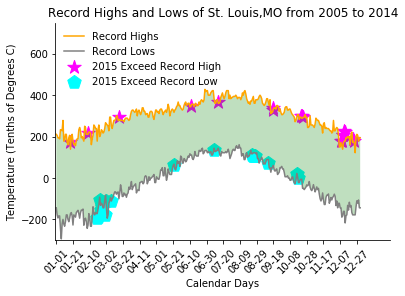

In [29]:
# Remove frame from chart
# Spines define data area boundaries; they connect the axis tick marks.
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()